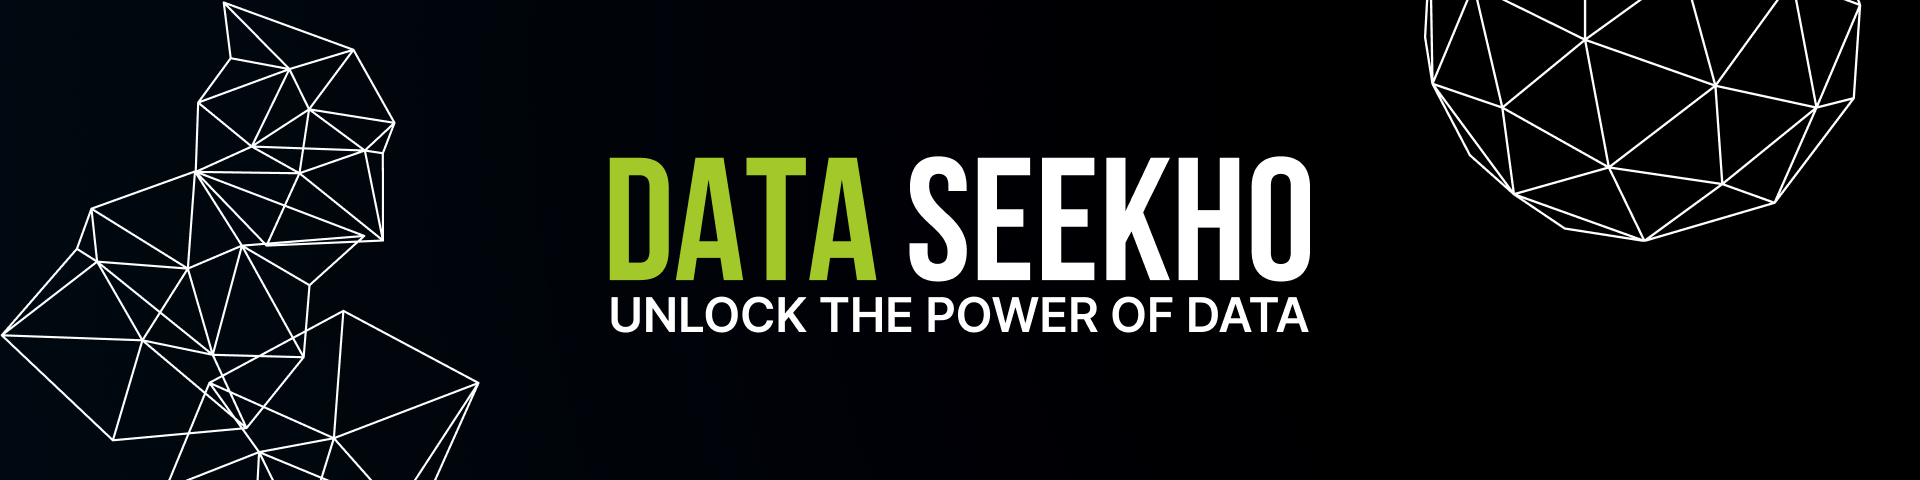

# **Project: Weather Real-Time Pakistan Cities Data Analysis**

## **Part 1: Data Scraping (Data Collection using OpenWeather API)**
- Use the OpenWeather API to collect real-time weather data for cities in Pakistan.
- Gather details such as temperature, humidity, wind speed, cloudiness, and description.
- Save the data into a structured format (e.g., CSV or DataFrame).

## **Part 2: Data Exploration**
- Load the dataset and inspect the structure.
- Perform initial data exploration to understand the features.
- Analyze summary statistics for numerical and categorical variables.

## **Part 3: Data Cleaning**
- Handle missing (e.g., fill missing values, drop duplicates).
- Convert columns (e.g., `Sunrise`, `Sunset`) to appropriate data types.
- Normalize column names and ensure data consistency.
- Remove unnecessary columns or rows containing errors or null values.

## **Part 4: Exploratory Data Analysis (EDA)**
- Analyze the distribution of numerical variables (e.g., temperature, humidity).
- Explore correlations between features.
- Investigate outliers and patterns in the dataset.
- Group and compare cities based on weather conditions.

## **Part 5: Data Visualization Using Seaborn and Matplotlib**
- Create visualizations such as histograms, scatterplots, boxplots, and heatmaps.
- Plot trends in weather conditions across cities.
- Visualize relationships between variables (e.g., temperature vs. humidity, cloudiness vs. wind speed).

`Note: This structure provides a clear breakdown of the steps involved in your project.`

# **Part 1: Data Scraping (Data Collection using OpenWeather API)**


### 1. Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"]=[10,5]
warnings.simplefilter(action="ignore",category=FutureWarning)

### 2.importing cities data

In [ ]:
cities = pd.read_csv('pakistan_cities.csv')
cities

,City,Province,Country
0,Karachi,Sindh,Pakistan
1,Hyderabad,Sindh,Pakistan
2,Sukkur,Sindh,Pakistan
3,Larkana,Sindh,Pakistan
4,Mirpurkhas,Sindh,Pakistan
...,...,...,...
142,Nasirabad,Balochistan,Pakistan
143,Tump,Balochistan,Pakistan
144,Kahan,Balochistan,Pakistan
145,Shahdadkot,Balochistan,Pakistan


## 3. data scrapping through api key

In [ ]:
import requests
import pandas as pd
from datetime import datetime

# Your API key
api_key = 'ed81a88dbb420aad2a9e4a227f2d58e9'

# Define an empty list to store the results
weather_data = []

# Loop through each city and its corresponding country in the DataFrame
for index, row in cities.iterrows():
    city = row['City']
    country = row['Country']  # Get the country from your CSV
    province = row['Province']
    # Construct the API request URL
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric'

    # Make the request to the API
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()  # Convert response to JSON format

        # Extract weather data
        temp = data['main']['temp']
        feels_like = data['main']['feels_like']
        temp_min = data['main']['temp_min']
        temp_max = data['main']['temp_max']
        humidity = data['main']['humidity']
        pressure = data['main']['pressure']
        wind_speed = data['wind']['speed']
        desc = data['weather'][0]['description']
        #country = data['sys']['country']
        clouds = data['clouds']['all']
        lon = data['coord']['lon']
        lat = data['coord']['lat']
        sunrise_unix = data['sys']['sunrise']
        sunset_unix = data['sys']['sunset']

        # Convert Unix timestamps to human-readable format
        sunrise = datetime.fromtimestamp(sunrise_unix).strftime('%I:%M %p')
        sunset = datetime.fromtimestamp(sunset_unix).strftime('%I:%M %p')

        # Append the data to the list
        weather_data.append({
            'Country': country,
            'Province':province,
            'City': city,
            'Temperature': temp,
            'Feels_Like': feels_like,
            'Min_Temp': temp_min,
            'Max_Temp': temp_max,
            'Humidity': humidity,
            'Pressure': pressure,
            'Wind_Speed': wind_speed,
            'Cloudiness': clouds,
            'Description': desc.capitalize(),
            'Longitude': lon,
            'Latitude': lat,
            'Sunrise': sunrise,
            'Sunset': sunset
        })

    else:
        # If the request fails, append an error message for that city
        weather_data.append({
            'City': city,
            'Error': f'Error fetching data: {response.status_code}'
        })

# Convert the list of weather data into a pandas DataFrame
weather_df = pd.DataFrame(weather_data)

### 4. viewing data

In [ ]:
weather_df

,Country,Province,City,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Description,Longitude,Latitude,Sunrise,Sunset,Error
0,Pakistan,Sindh,Karachi,28.90,33.25,28.90,28.90,74.0,1007.0,3.60,40.0,Smoke,67.0822,24.9056,01:18 AM,01:33 PM,NaN
1,Pakistan,Sindh,Hyderabad,26.23,26.23,26.23,27.73,69.0,1008.0,4.63,20.0,Few clouds,78.4744,17.3753,12:34 AM,12:46 PM,NaN
2,Pakistan,Sindh,Sukkur,35.01,34.90,35.01,35.01,31.0,1003.0,2.79,0.0,Clear sky,68.8574,27.7052,01:10 AM,01:27 PM,NaN
3,Pakistan,Sindh,Larkana,32.86,32.97,32.86,32.86,37.0,1004.0,2.64,0.0,Clear sky,68.2141,27.5551,01:13 AM,01:29 PM,NaN
4,NaN,NaN,Mirpurkhas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Error fetching data: 404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Pakistan,Balochistan,Nasirabad,27.78,28.21,27.78,27.78,50.0,1007.0,3.56,63.0,Broken clouds,74.7333,26.3000,12:47 AM,01:03 PM,NaN
143,NaN,NaN,Tump,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Error fetching data: 404
144,Pakistan,Balochistan,Kahan,22.27,21.47,22.27,22.27,35.0,1026.0,3.47,65.0,Broken clouds,33.8196,51.4450,03:23 AM,03:55 PM,NaN
145,Pakistan,Balochistan,Shahdadkot,33.29,33.81,33.29,33.29,38.0,1003.0,3.96,0.0,Clear sky,67.9055,27.8477,01:14 AM,01:31 PM,NaN


## 5. saving data to csv

In [ ]:
weather_df.to_csv('pakistan_weather_data.csv', index=False)
weather_df.head()

,Country,Province,City,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Description,Longitude,Latitude,Sunrise,Sunset,Error
0,Pakistan,Sindh,Karachi,28.90,33.25,28.90,28.90,74.0,1007.0,3.60,40.0,Smoke,67.0822,24.9056,01:18 AM,01:33 PM,NaN
1,Pakistan,Sindh,Hyderabad,26.23,26.23,26.23,27.73,69.0,1008.0,4.63,20.0,Few clouds,78.4744,17.3753,12:34 AM,12:46 PM,NaN
2,Pakistan,Sindh,Sukkur,35.01,34.90,35.01,35.01,31.0,1003.0,2.79,0.0,Clear sky,68.8574,27.7052,01:10 AM,01:27 PM,NaN
3,Pakistan,Sindh,Larkana,32.86,32.97,32.86,32.86,37.0,1004.0,2.64,0.0,Clear sky,68.2141,27.5551,01:13 AM,01:29 PM,NaN
4,NaN,NaN,Mirpurkhas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Error fetching data: 404


# **Part 2: Data Exploration**
### 1. Load the Dataset and Inspect the First Few Rows

In [ ]:
df=pd.read_csv("/content/pakistan_weather_data.csv")
df.head(10)

,Country,Province,City,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Description,Longitude,Latitude,Sunrise,Sunset,Error
0,Pakistan,Sindh,Karachi,28.90,33.25,28.90,28.90,74.0,1007.0,3.60,40.0,Smoke,67.0822,24.9056,01:18 AM,01:33 PM,NaN
1,Pakistan,Sindh,Hyderabad,26.23,26.23,26.23,27.73,69.0,1008.0,4.63,20.0,Few clouds,78.4744,17.3753,12:34 AM,12:46 PM,NaN
2,Pakistan,Sindh,Sukkur,35.01,34.90,35.01,35.01,31.0,1003.0,2.79,0.0,Clear sky,68.8574,27.7052,01:10 AM,01:27 PM,NaN
3,Pakistan,Sindh,Larkana,32.86,32.97,32.86,32.86,37.0,1004.0,2.64,0.0,Clear sky,68.2141,27.5551,01:13 AM,01:29 PM,NaN
4,NaN,NaN,Mirpurkhas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Error fetching data: 404
5,Pakistan,Sindh,Nawabshah,32.76,35.02,32.76,32.76,47.0,1004.0,5.39,0.0,Clear sky,68.4096,26.2483,01:12 AM,01:28 PM,NaN
6,Pakistan,Sindh,Jacobabad,32.51,33.23,32.51,32.51,41.0,1003.0,3.22,0.0,Clear sky,68.4388,28.2810,01:12 AM,01:29 PM,NaN
7,Pakistan,Sindh,Dadu,35.09,35.72,35.09,35.09,34.0,1003.0,3.48,0.0,Clear sky,67.7763,26.7329,01:15 AM,01:31 PM,NaN
8,Pakistan,Sindh,Thatta,28.10,31.00,28.10,28.10,71.0,1007.0,5.59,0.0,Clear sky,67.9235,24.7475,01:15 AM,01:30 PM,NaN
9,Pakistan,Sindh,Badin,30.27,33.35,30.27,30.27,60.0,1006.0,5.92,0.0,Clear sky,68.8384,24.6560,01:11 AM,01:26 PM,NaN


## 2. inspecting last few rows

In [ ]:
df.tail(3)

,country,province,city,temperature,feels_like,min_temp,max_temp,humidity,pressure,wind_speed,cloudiness,description,longitude,latitude,sunrise,sunset,area
144,Pakistan,Balochistan,Kahan,22.27,21.47,22.27,22.27,35.0,1026.0,3.47,65.0,Broken clouds,33.8196,51.4450,2024-09-17 03:23:00,2024-09-17 15:55:00,85.2646
145,Pakistan,Balochistan,Shahdadkot,33.29,33.81,33.29,33.29,38.0,1003.0,3.96,0.0,Clear sky,67.9055,27.8477,2024-09-17 01:14:00,2024-09-17 13:31:00,95.7532
146,Pakistan,Balochistan,Ormara,26.92,30.41,26.92,26.92,89.0,1006.0,6.59,15.0,Few clouds,64.6357,25.2088,2024-09-17 01:28:00,2024-09-17 13:43:00,89.8445


## 3.shape of data

In [ ]:
df.shape

(147, 17)

## 4. Check the Structure of the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      121 non-null    object 
 1   Province     121 non-null    object 
 2   City         147 non-null    object 
 3   Temperature  121 non-null    float64
 4   Feels_Like   121 non-null    float64
 5   Min_Temp     121 non-null    float64
 6   Max_Temp     121 non-null    float64
 7   Humidity     121 non-null    float64
 8   Pressure     121 non-null    float64
 9   Wind_Speed   121 non-null    float64
 10  Cloudiness   121 non-null    float64
 11  Description  121 non-null    object 
 12  Longitude    121 non-null    float64
 13  Latitude     121 non-null    float64
 14  Sunrise      121 non-null    object 
 15  Sunset       121 non-null    object 
 16  Error        26 non-null     object 
dtypes: float64(10), object(7)
memory usage: 19.6+ KB


## 5. Summary Statistics for Numerical Columns

In [ ]:
df.describe()

,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Longitude,Latitude
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,30.060496,30.403471,30.056364,30.091818,43.066116,1006.165289,3.350909,14.628099,68.753469,29.888118
std,4.788083,5.260938,4.797957,4.766143,17.418733,3.782299,1.576726,29.146221,12.616513,5.117664
min,7.180000,5.360000,7.180000,7.180000,13.000000,1003.000000,0.000000,0.000000,-9.569000,8.518500
25%,27.860000,27.970000,27.860000,27.860000,31.000000,1004.000000,2.390000,0.000000,68.223100,27.529500
50%,31.480000,31.390000,31.480000,31.670000,39.000000,1005.000000,3.220000,0.000000,70.634800,30.300000
75%,33.320000,34.120000,33.320000,33.320000,51.000000,1007.000000,3.960000,15.000000,72.934100,32.161700
max,37.720000,40.030000,37.720000,37.720000,89.000000,1026.000000,8.060000,100.000000,117.789200,51.445000


## 6. checking for null values in data

In [ ]:
df.isnull().sum()

,0
Country,26
Province,26
City,0
Temperature,26
Feels_Like,26
Min_Temp,26
Max_Temp,26
Humidity,26
Pressure,26
Wind_Speed,26


### 7. Check for Unique Values in cities Column

In [ ]:
# Unique values in 'City' column
df['city'].unique()

array(['Karachi', 'Hyderabad', 'Sukkur', 'Larkana', 'Nawabshah',
       'Jacobabad', 'Dadu', 'Thatta', 'Badin', 'Shikarpur', 'Khairpur',
       'Tando Adam', 'Tando Allahyar', 'Sanghar', 'Umerkot', 'Jamshoro',
       'Matiari', 'Ghotki', 'Qambar', 'Shahdadkot', 'Hala', 'Samaro',
       'Pano Aqil', 'Pithoro', 'Pir Jo Goth', 'Kotri', 'Daro', 'Daur',
       'Kandiaro', 'Shahpur Chakar', 'Lakha', 'Sann', 'Khipro', 'Lahore',
       'Faisalabad', 'Rawalpindi', 'Multan', 'Gujranwala', 'Sialkot',
       'Bahawalpur', 'Sargodha', 'Sheikhupura', 'Jhang', 'Kasur', 'Okara',
       'Sahiwal', 'Dera Ghazi Khan', 'Toba Tek Singh', 'Chiniot',
       'Narowal', 'Mianwali', 'Khushab', 'Layyah', 'Bhakkar', 'Hafizabad',
       'Muridke', 'Jaranwala', 'Pattoki', 'Arifwala', 'Burewala',
       'Pakpattan', 'Kahror Pakka', 'Kot Addu', 'Depalpur', 'Samundri',
       'Jalalpur Bhattian', 'Khanewal', 'Shorkot', 'Peshawar', 'Mardan',
       'Kohat', 'Dera Ismail Khan', 'Bannu', 'Charsadda', 'Nowshera',
       '

## 8. checking for cities counts for different types of weather


In [ ]:
df['Description'].value_counts()

,count
Description,
Clear sky,87
Few clouds,9
Overcast clouds,9
Scattered clouds,5
Broken clouds,5
Smoke,4
Light rain,1
Haze,1


## 9.viewing city which has rain today

In [ ]:
df[df['Description'] == 'Light rain'][['Province','City']]


,Province,City
31,Sindh,Daro


## 10. checking todays okara temp

In [ ]:
df[df['City'] == 'Okara']['Temperature']


,Temperature
50,31.86


## 11. checking all information related to okara

In [ ]:
df[df['City'] == 'Okara']


,Country,Province,City,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Description,Longitude,Latitude,Sunrise,Sunset,Error
50,Pakistan,Punjab,Okara,31.86,30.66,31.86,31.86,30.0,1004.0,2.96,1.0,Clear sky,73.4458,30.8081,12:51 AM,01:09 PM,NaN


## checking which province's city  has maximum temperature

In [ ]:
df[df['Temperature'] == df['Temperature'].max()][['Province', 'City']]


,Province,City
128,Balochistan,Sibi


## checking which province's city  has minimum temperature

In [ ]:
df[df['Temperature'] == df['Temperature'].min()][['Province', 'City']]



,Province,City
87,Khyber Pakhtunkhwa,Khyber


# checking for the biggest city latitude and longitude wise

In [ ]:
city_max_longitude = df[df['Longitude'] == df['Longitude'].max()]['City']
city_max_latitude = df[df['Latitude'] == df['Latitude'].max()]['City']
print(city_max_longitude)
print(city_max_latitude)


91    Hangu
Name: City, dtype: object
144    Kahan
Name: City, dtype: object


## adding new column of area in data (df)

In [ ]:
df['Area'] = df['Longitude'] + df['Latitude']
city_max_area = df[df['Area'] == df['Area'].max()]['City']
print(city_max_area)

91    Hangu
Name: City, dtype: object


In [ ]:
df.head(5)

,country,province,city,temperature,feels_like,min_temp,max_temp,humidity,pressure,wind_speed,cloudiness,description,longitude,latitude,sunrise,sunset,area
0,Pakistan,Sindh,Karachi,28.90,33.25,28.90,28.90,74.0,1007.0,3.60,40.0,Smoke,67.0822,24.9056,2024-09-17 01:18:00,2024-09-17 13:33:00,91.9878
1,Pakistan,Sindh,Hyderabad,26.23,26.23,26.23,27.73,69.0,1008.0,4.63,20.0,Few clouds,78.4744,17.3753,2024-09-17 00:34:00,2024-09-17 12:46:00,95.8497
2,Pakistan,Sindh,Sukkur,35.01,34.90,35.01,35.01,31.0,1003.0,2.79,0.0,Clear sky,68.8574,27.7052,2024-09-17 01:10:00,2024-09-17 13:27:00,96.5626
3,Pakistan,Sindh,Larkana,32.86,32.97,32.86,32.86,37.0,1004.0,2.64,0.0,Clear sky,68.2141,27.5551,2024-09-17 01:13:00,2024-09-17 13:29:00,95.7692
5,Pakistan,Sindh,Nawabshah,32.76,35.02,32.76,32.76,47.0,1004.0,5.39,0.0,Clear sky,68.4096,26.2483,2024-09-17 01:12:00,2024-09-17 13:28:00,94.6579


# **Part 3: Data Cleaning**

### Step 1: Delete Unnecessary Columns and Null/Error Rows

In [ ]:
# Drop columns 'unnamed: 0' and 'error'
df.drop(columns=['Error'], inplace=True)


### Step 2: Handle Missing data

In [ ]:
# Check for missing values
print(df.isnull().sum())

Country        26
Province       26
City            0
Temperature    26
Feels_Like     26
Min_Temp       26
Max_Temp       26
Humidity       26
Pressure       26
Wind_Speed     26
Cloudiness     26
Description    26
Longitude      26
Latitude       26
Sunrise        26
Sunset         26
Area           26
dtype: int64


## droping missing values

In [ ]:
# Drop rows with any null values in the dataset
df.dropna(inplace=True)
df

,Country,Province,City,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Description,Longitude,Latitude,Sunrise,Sunset,Area
0,Pakistan,Sindh,Karachi,28.90,33.25,28.90,28.90,74.0,1007.0,3.60,40.0,Smoke,67.0822,24.9056,01:18 AM,01:33 PM,91.9878
1,Pakistan,Sindh,Hyderabad,26.23,26.23,26.23,27.73,69.0,1008.0,4.63,20.0,Few clouds,78.4744,17.3753,12:34 AM,12:46 PM,95.8497
2,Pakistan,Sindh,Sukkur,35.01,34.90,35.01,35.01,31.0,1003.0,2.79,0.0,Clear sky,68.8574,27.7052,01:10 AM,01:27 PM,96.5626
3,Pakistan,Sindh,Larkana,32.86,32.97,32.86,32.86,37.0,1004.0,2.64,0.0,Clear sky,68.2141,27.5551,01:13 AM,01:29 PM,95.7692
5,Pakistan,Sindh,Nawabshah,32.76,35.02,32.76,32.76,47.0,1004.0,5.39,0.0,Clear sky,68.4096,26.2483,01:12 AM,01:28 PM,94.6579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Pakistan,Balochistan,Bela,25.77,26.65,25.77,25.77,86.0,1003.0,5.76,100.0,Overcast clouds,81.9833,25.9333,12:18 AM,12:34 PM,107.9166
142,Pakistan,Balochistan,Nasirabad,27.78,28.21,27.78,27.78,50.0,1007.0,3.56,63.0,Broken clouds,74.7333,26.3000,12:47 AM,01:03 PM,101.0333
144,Pakistan,Balochistan,Kahan,22.27,21.47,22.27,22.27,35.0,1026.0,3.47,65.0,Broken clouds,33.8196,51.4450,03:23 AM,03:55 PM,85.2646
145,Pakistan,Balochistan,Shahdadkot,33.29,33.81,33.29,33.29,38.0,1003.0,3.96,0.0,Clear sky,67.9055,27.8477,01:14 AM,01:31 PM,95.7532


### Step 3: Normalize Column Names

In [ ]:
# Normalize column names (lowercase and replace spaces with underscores)
df.columns = df.columns.str.lower()

In [ ]:
df.columns

Index(['country', 'province', 'city', 'temperature', 'feels_like', 'min_temp',
       'max_temp', 'humidity', 'pressure', 'wind_speed', 'cloudiness',
       'description', 'longitude', 'latitude', 'sunrise', 'sunset', 'area'],
      dtype='object')

### Step 4: Remove Duplicate Rows

In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

### Step 5: Convert Columns to Appropriate Data Types such as sunrise and sunset

In [ ]:
# Convert 'Sunrise' and 'Sunset' to datetime format
df['sunrise'] = pd.to_datetime(df['sunrise'], errors='coerce')
df['sunset'] = pd.to_datetime(df['sunset'], errors='coerce')

<ipython-input-63-d8a851ab3e95>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sunrise'] = pd.to_datetime(df['sunrise'], errors='coerce')
<ipython-input-63-d8a851ab3e95>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sunset'] = pd.to_datetime(df['sunset'], errors='coerce')


# Part (4,5): **EDA + Data Visualization**

### 1. Analyze the Distribution of Numerical Variables

# **1. Distribution plots**

# **1. histogram and kde plot**

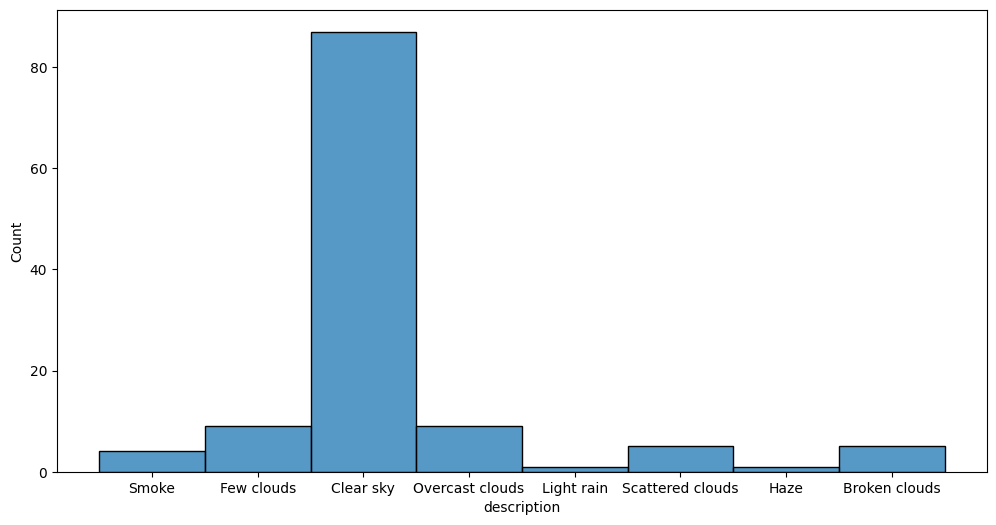

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df["description"],kde=False)
plt.show()

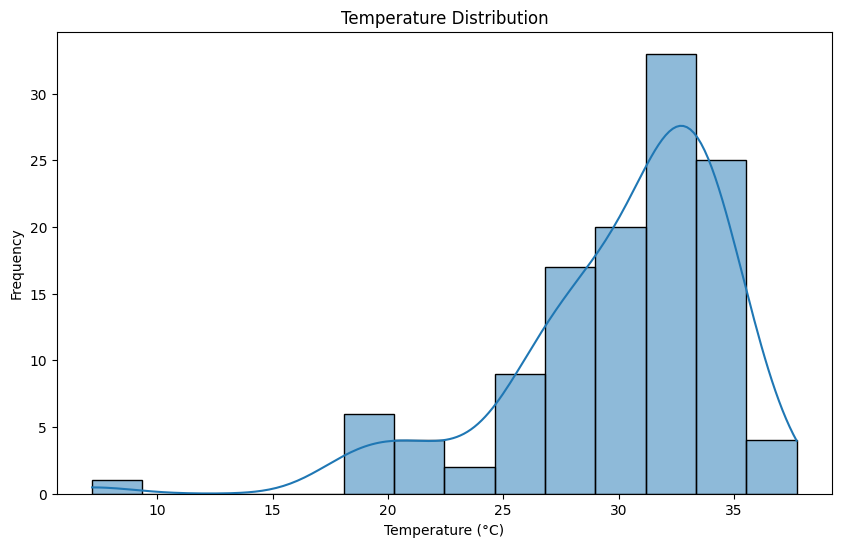

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for Temperature
plt.figure(figsize=(10, 6))
sns.histplot(df['temperature'], kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

## dist plot

<function matplotlib.pyplot.show(close=None, block=None)>

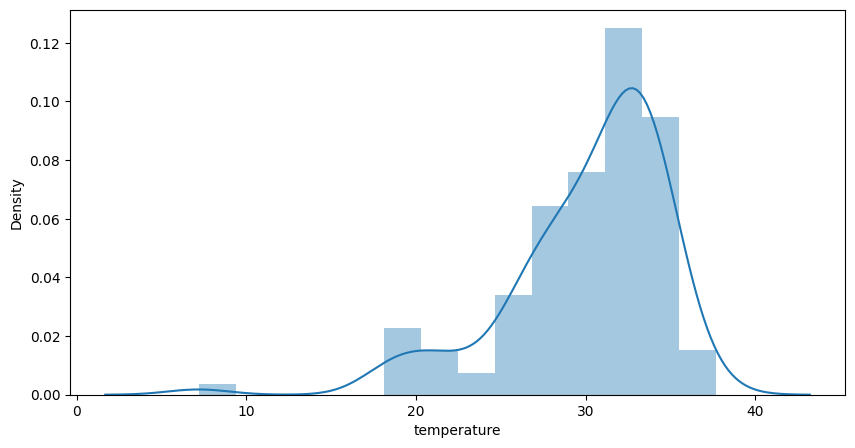

In [ ]:
sns.distplot(df["temperature"])
plt.show

# **2. Relational Plots**

# **1. line and scatter plots**

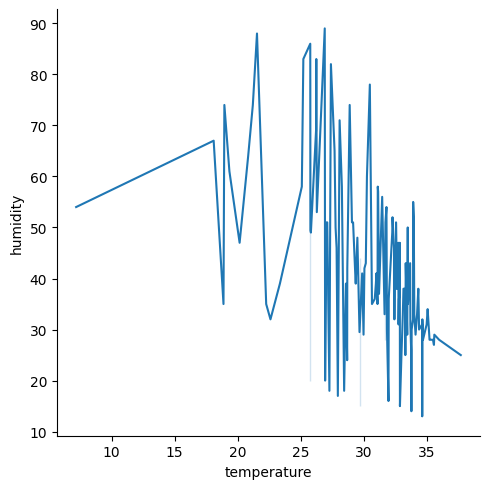

In [ ]:

sns.relplot(x="temperature",y="humidity",data=df,kind="line")
plt.show()

# **3. Categorical plot**
## **1.Barplot**

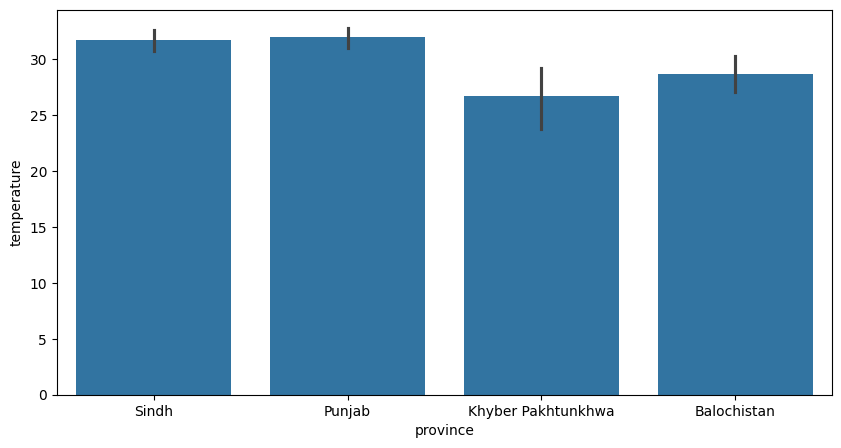

In [ ]:

sns.barplot(x="province",y="temperature",data=df)
plt.show()

# **2. strip plot**

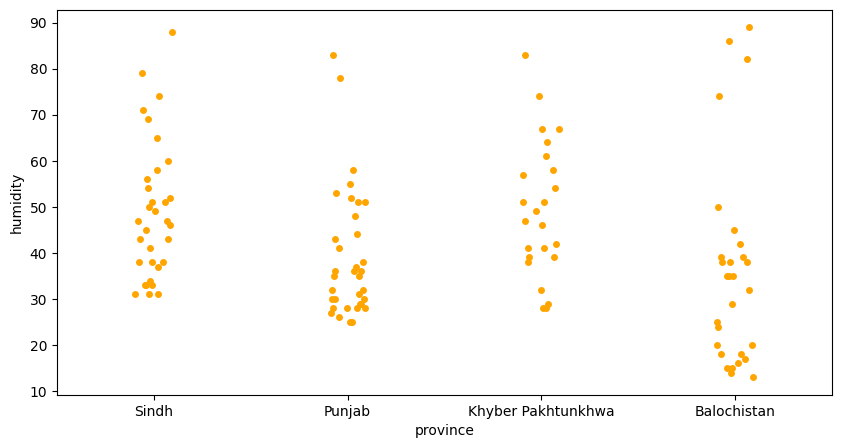

In [ ]:

sns.stripplot(x="province",y="humidity",data=df,color="orange")
plt.show()

### **3. Swarmplot**


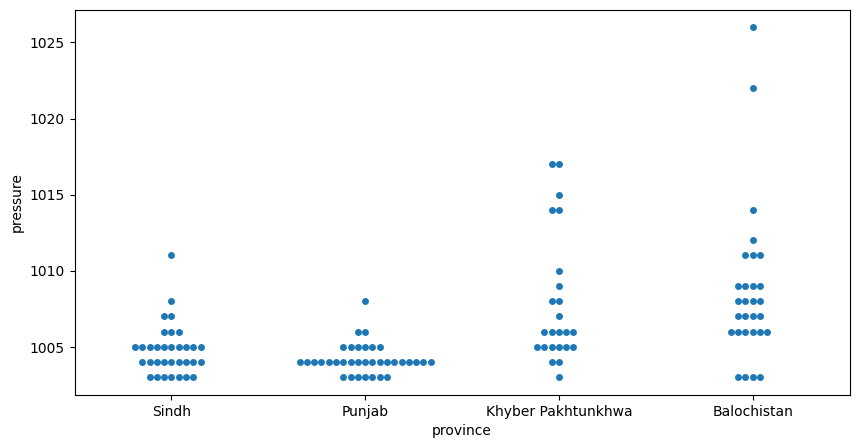

In [ ]:

sns.swarmplot(x="province",y="pressure",data=df)
plt.show()

# **4. box plot**

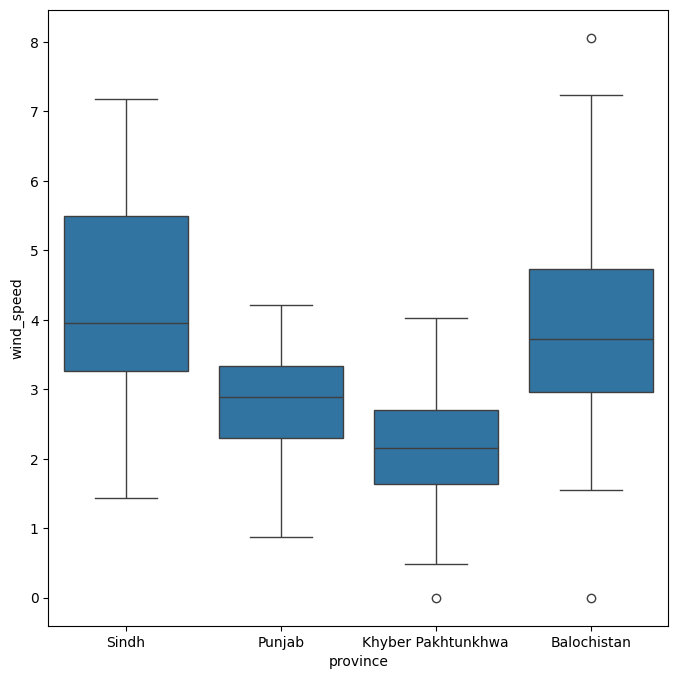

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x="province",y="wind_speed",data=df)
plt.show()

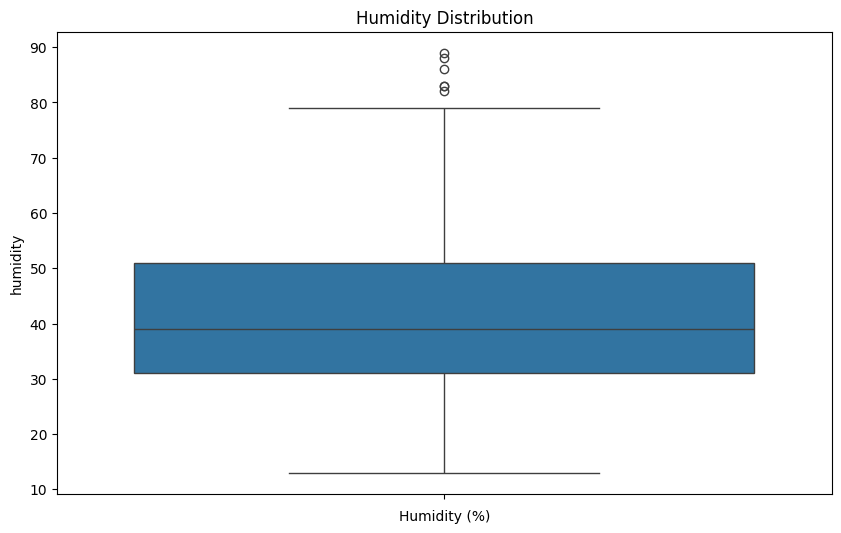

In [ ]:
# Boxplot for Humidity
plt.figure(figsize=(10, 6))
sns.boxplot(df['humidity'])
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.show()

# **removing outliers in humidity**

In [ ]:
# Define the column where you want to remove outliers
column = 'humidity'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
humidity_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

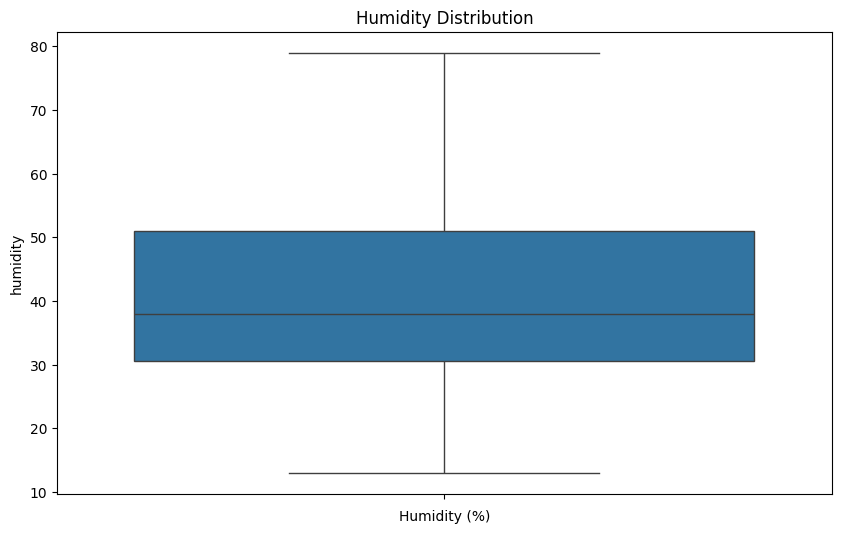

In [ ]:
# Boxplot for Humidity after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(humidity_no_outliers['humidity'])
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.show()

## 5. violin plot

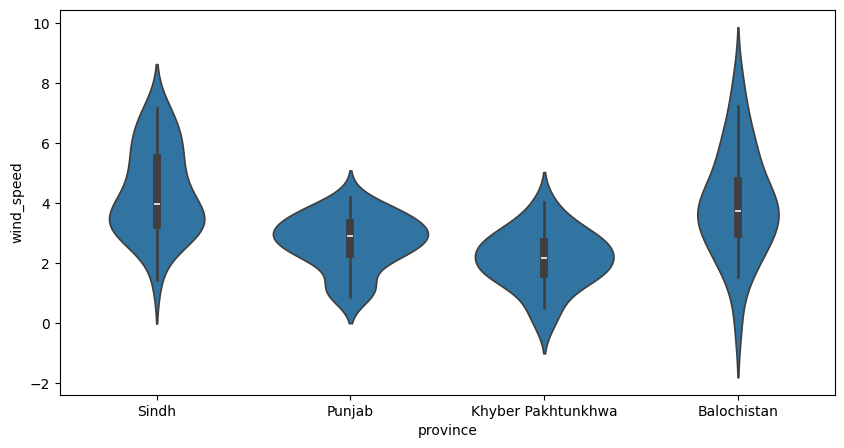

In [ ]:

sns.violinplot(x="province",y="wind_speed",data=df)
plt.show()

# 6. count plot

## investigate description by city

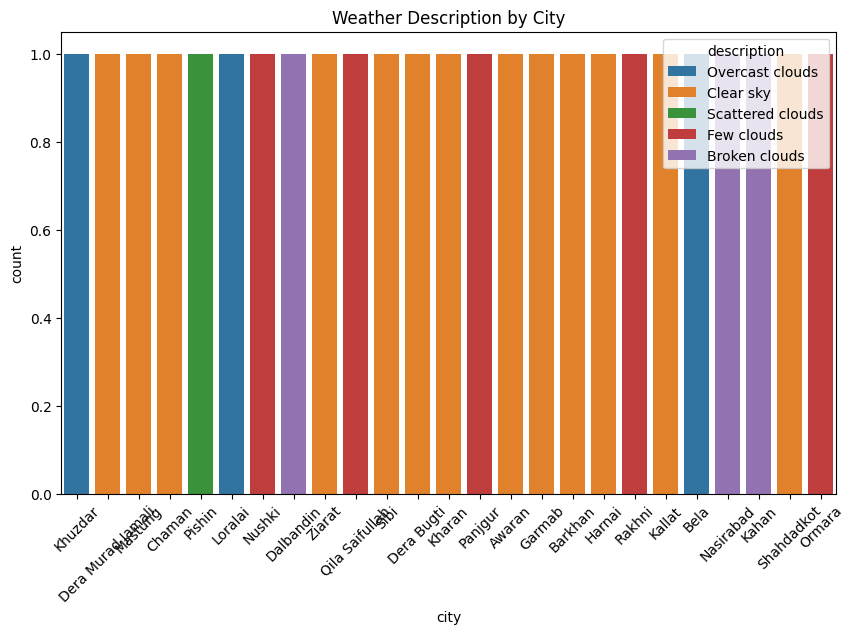

In [ ]:
# Explore the weather descriptions in different cities to identify any common patterns.

# Count plot for weather descriptions by city
plt.figure(figsize=(10, 6))
sns.countplot(x='city', hue='description', data=df.tail(25))
plt.title('Weather Description by City')
plt.xticks(rotation=45)
plt.show()

# **4. Matrix plot**

## **Heatmap**

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()


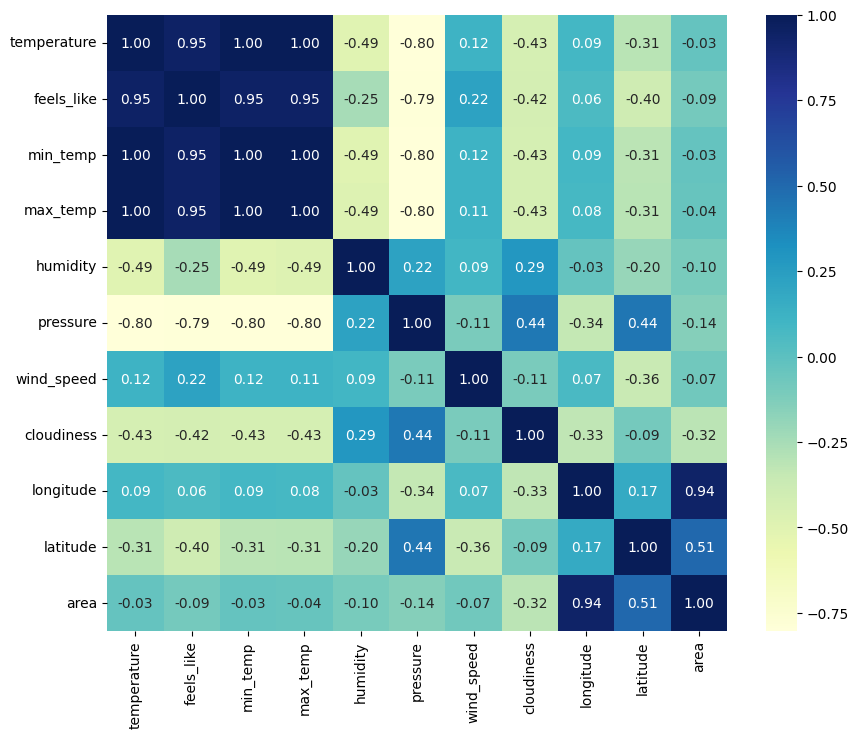

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,cmap="YlGnBu",annot=True,fmt=".2f")
plt.show()

# pi chart

## which province has more area

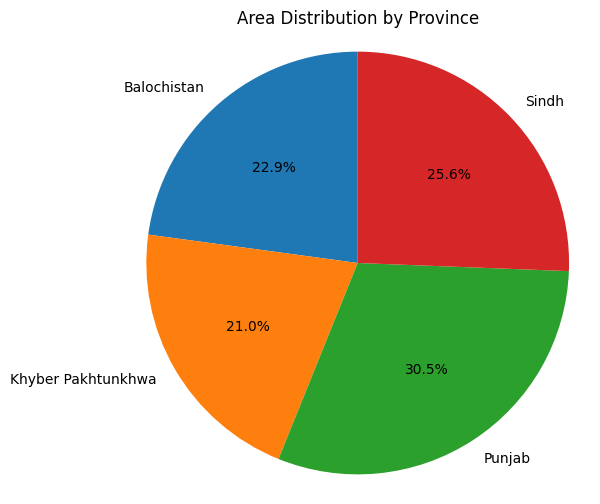

In [ ]:
# Group by 'Province' and sum the 'Area'
province_area = df.groupby('province')['area'].sum()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(province_area, labels=province_area.index, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that the pie chart is a circle.
plt.axis('equal')

# Display the pie chart
plt.title('Area Distribution by Province')
plt.show()
